<center> <font size="6"> <b>One-way Analysis of Variance</b></font> 
</center>

<center> <font size="6">One-way ANOVA</font> 
</center>

<div>
<img src ="one-way-anova-2.png" style ="width:0.1px;height:0.2px"/>
</div>

The One-Way ANOVA technique is used to determine if there is statistically significant differences between averages of three or more independent groups. Similar to the T-test analysis, the One-Way ANOVA tests a Null hypothesis, which can be represented as:

### Null Hypothesis
<center> <font size="5"> $H_{0} : \mu_{1} = \mu_{2} = \mu_{3} = ... = \mu_{i}$</font> 
</center>
- Where $H_{0}$ is the theoretical hypothesis in question i.e, students who attend the A_Step Supplemental Instruction tutorials perform similar to those who do not attend the tutorials and $\mu_{i}$ represents the calculated averages from the three or more independent groups. For instances, Group <b>A</b>: students that attended 1-4 tutorials, Group <b>B</b>: students that attended at least 5 tutorials and Group <b>C</b>: students that did not attend at all. Refer to the figure above for a visual perspective.

Alternatively, it could be that there is statistically significant differences between the mean final marks of at least one group among Groups <b>A-C</b>, which is our Alternative Hypothesis $H_{1}$:
<center> <font size="5"> $H_{1} : \mu_{1} \neq \mu_{2} \neq \mu_{3} \neq ... \neq \mu_{i}$</font> 
</center>

It must be noted that the One-Way ANOVA method will not point out which group(s) has different mean (final marks) , for that we will employ other methods.

In [1]:
#pip install pingouin

In [2]:
# loading analysis packages

# data analysis packages
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import pyreadr
from sklearn.linear_model import LinearRegression
from numpy.random import randn
from numpy.random import seed
import pingouin as pg
# data visualization packages
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
# loading student data
r_dt = pyreadr.read_r('complete_data.RData')
# objects
print(r_dt.keys()) # let's check what objects we got
df = r_dt['GroupedData'] # csv
df.info()

odict_keys(['GroupedData'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49329 entries, 0 to 49328
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Attendee       49329 non-null  int32  
 1   Module.Code    49329 non-null  object 
 2   Campus         49329 non-null  object 
 3   FACULTY        49329 non-null  object 
 4   GR_12_ADSCORE  49329 non-null  object 
 5   FINAL.MARK     49329 non-null  int32  
 6   Tutor.Type     49329 non-null  object 
 7   freq           49329 non-null  float64
 8   Term           49329 non-null  object 
 9   success        49329 non-null  float64
dtypes: float64(2), int32(2), object(6)
memory usage: 3.4+ MB


Separating student data based on tutorial attenance. We are looking to create the three Groups <b>A-C</b>:

- Group <b>A</b>: students that attended 1-4 tutorials.
- Group <b>B</b>: students that attended at least 5 tutorials.
- Group <b>C</b>: students that did not attended any tutorials.

In [4]:
df.head()

,Attendee,Module.Code,Campus,FACULTY,GR_12_ADSCORE,FINAL.MARK,Tutor.Type,freq,Term,success
0,1984084838,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,0,73,NOR,5.0,SEM1,1.0
1,1984084838,EECF1624,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,0,85,NOR,4.0,SEM2,1.0
2,1986413316,HLAP2614,MAIN,HUMANITIES,0,88,NOR,5.0,SEM1,1.0
3,1991296342,HKGK2614,MAIN,HUMANITIES,0,71,NOR,3.0,SEM1,1.0
4,1991296342,HKGK2724,MAIN,HUMANITIES,0,66,NOR,5.0,SEM2,1.0


In [5]:
# data selection
fac = input('Enter the faculty of interest:') # name of the faculty
term = input('Enter the term of interest:') # the semester
mod = input('Enter the code of the modil of interest:') # the module code

def dataSelector(fac, term, mod):
    
    fuc = df.loc[lambda df: (df['FACULTY'] == fac) & (df['Term'] == term)] # data based on the selected faculty & semester
    modCode = fuc.loc[lambda fuc: fuc['Module.Code'] == mod] # data based on module code
    return modCode
dt = dataSelector(fac, term, mod)
dt

Enter the faculty of interest:ECONOMIC AND MANAGEMENT SCIENCES
Enter the term of interest:SEM1
Enter the code of the modil of interest:EECF1614


,Attendee,Module.Code,Campus,FACULTY,GR_12_ADSCORE,FINAL.MARK,Tutor.Type,freq,Term,success
0,1984084838,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,0,73,NOR,5.0,SEM1,1.0
8,1996473417,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,24,50,NOR,4.0,SEM1,1.0
28,2003002827,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,44,79,NOR,7.0,SEM1,1.0
38,2004184715,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,36,87,NOR,8.0,SEM1,1.0
82,2007009281,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,50,46,NOR,4.0,SEM1,0.0
...,...,...,...,...,...,...,...,...,...,...
48626,2016415438,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,36,54,NOR,0.0,SEM1,1.0
48676,2016416857,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,31,66,NOR,0.0,SEM1,1.0
48934,2016426294,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,34,78,NOR,0.0,SEM1,1.0
49210,2016437234,EECF1614,MAIN,ECONOMIC AND MANAGEMENT SCIENCES,35,64,NOR,0.0,SEM1,1.0


In [6]:
att_max = dt['freq'].max()
att_min = dt['freq'].min()
thresh = 0.8*att_max
# knowing the distribution of our attendance, we can create our three groups of interest.
#df = df.sort_values(by = 'absences')

grpA = dt.loc[lambda dt: dt['freq'] >= thresh]
grpC = dt.loc[lambda dt: dt['freq'] >= att_min]
grpB = dt.loc[lambda dt: (dt['freq'] > 0) & (dt['freq'] < thresh)]
grpA_avg, grpB_avg, grpC_avg = np.average(grpA['FINAL.MARK']), np.average(grpB['FINAL.MARK']), np.average(grpC['FINAL.MARK'])
nA, nB, nC = len(grpA), len(grpB), len(grpC)
nS = nA + nB + nC
stuff_in_string = ('Out of a total of {} students enrolled for the module ' + mod + ', {} attended at least 80% of the A_Step Supplemental Instruction tutorials, while {} attended at most 80% and {} did not attend any of the tutorials.').format(nS, nA, nB, nC)
print(stuff_in_string)

Out of a total of 1830 students enrolled for the module EECF1614, 19 attended at least 80% of the A_Step Supplemental Instruction tutorials, while 776 attended at most 80% and 1035 did not attend any of the tutorials.


Text(0.5, 1.0, 'Student Final Marks Per Independent Group')

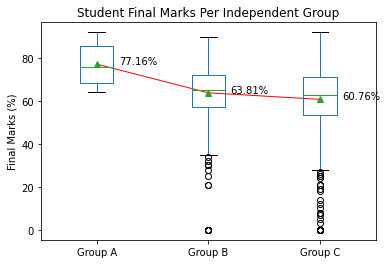

In [7]:
GroupAVG_final_marks = {'Group A': grpA['FINAL.MARK'], 'Group B': grpB['FINAL.MARK'], 'Group C': grpC['FINAL.MARK']}

dF = pd.DataFrame.from_dict(data = GroupAVG_final_marks)
a,b,c = [1,grpA_avg],[2, grpB_avg],[3, grpC_avg]
ABx_values = [a[0], b[0]]
ABy_values = [a[1], b[1]]
BCx_values = [b[0], c[0]]
BCy_values = [b[1], c[1]]
plt.plot(ABx_values, ABy_values, 'r-', linewidth=1.0)
plt.plot(BCx_values, BCy_values, 'r-', linewidth=1.0) 
dF.boxplot(grid=False, showmeans=True)
plt.ylabel('Final Marks (%)')
plt.text(x=1.2,y=grpA_avg,s = '%.2f'%grpA_avg+'%', fontsize=10)
plt.text(x=2.2,y=grpB_avg,s = '%.2f'%grpB_avg+'%', fontsize=10)
plt.text(x=3.2,y=grpC_avg,s = '%.2f'%grpC_avg+'%', fontsize=10)
plt.title('Student Final Marks Per Independent Group')

In [8]:
# Conduct the one-way ANOVA
f_stat, p = f_oneway(grpA['freq'], grpB['freq'], grpC['freq'])
print('F-stat: %.3f' % f_stat, '\n',
     'p-value: %.1E' % p)

F-stat: 82.829 
 p-value: 3.7E-35


The One-Way ANOVA relies on the F-statistic technique for comparing variances of two samples (groups). The F-test value can be determined with:

<center> <font size="5"> $F_{stat} = \frac{s_{1}^{2}}{s_{2}^{2}}$</font> 
</center>

- where $S_{i}^{2}$ represents the variance of group A and B respectively.

If the variances of the two samples are equal $F_{stat}$ will equal 1, hence confirming the Null Hypothesis. Therefore if $F_{stat} \sim 1$ then the Null Hypothesis is true, while for samples with $F_{stat} > 1$ the Null Hypothesis is rejected. The p-value informs us about the probability of observing mean differences IF the Null Hypothesis is true, therefore if p-value > 0.05, the Null Hypothesis is accepted and vice-versa.

In [9]:
if p > 0.05:
    print('The Multi-sample F-statistic determined is F-stat: %.3f' % f_stat, '.The calculated p-value: %.1E' % p, ',is greater than 0.05 therefore we accept the Null Hypothesis.')
elif p < 0.05:
    print('The Multi-sample F-statistic determined is F-stat: %.3f' % f_stat, '.The calculated p-value: %.1E' % p, ',is less than 0.05 therefore we reject the Null Hypothesis.')
if f_stat == 1:
    print('The Multi-sample F-statistic determined is F-stat: %.3f' % f_stat, ',is equal to 1.0 therefore we accept the Null Hypothesis.')


The Multi-sample F-statistic determined is F-stat: 82.829 .The calculated p-value: 3.7E-35 ,is less than 0.05 therefore we reject the Null Hypothesis.


In [10]:
# eta^2 calculation

eta2 = f_stat**2 / (1 + f_stat**2)
eta2
print('eta2: %.3f' % eta2)

eta2: 1.000


### Eta-Squared or Effect Size ( $\eta^{2}$ ) in a One-Way ANOVA
$\eta^{2}$ is a measure of effect size in One-way ANOVA. It can be interpreted as follows:

- $\eta^{2}$ is $\sim$ 0.1: Small effect size
- $\eta^{2}$ is $\sim$ 0.6: Medium effect size
- $\eta^{2}$ is $\geq$ 0.14: Large effect size

In [11]:
if eta2 <= 0.1:
    print('An effect size was calculated, and a small effect is found: %.3f' % eta2 )
elif 0.1 < eta2 <= 0.6:
    print('An effect size was calculated, and a medium effect is found: %.3f' % eta2 )
elif 0.6 < eta2 <= 0.14:
    print('An effect size was calculated, and an intermedium effect is found: %.3f' % eta2 )
elif eta2 > 0.14:
    print('An effect size was calculated, and a large effect is found: %.3f' % eta2 )

An effect size was calculated, and a large effect is found: 1.000


### Determination Coefficient or $R^2$.

The determination coefficient is an outcome of linear regression between two or more independent parameters. Also known as $R^{2}$, this tells us what percentages of the dependent parameter's variability is explained by variability in the independent parameter. Therefore for samples with large $R^{2}$, the Null Hypothesis is rejected. For samples with similar averages, $R^{2}$ is always zero.

<center> <font size="5"> $R^{2} =  1 - \frac{SS_{res}}{SS_{tot}}$</font> 
</center>

- where $SS_{res}$ is the sum of squares of the residual errors.
- where $SS_{tot}$ is the total sum of the errors.

Text(0.5, 0, 'Attendance')

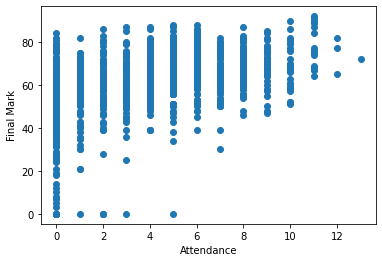

In [12]:
# Calculating (R^2) or the Determination Coefficient
plt.scatter(dt['freq'], dt['FINAL.MARK'])
plt.ylabel('Final Mark')
plt.xlabel('Attendance')

In [13]:
G1, absences = np.array([dt['FINAL.MARK']]), np.array([dt['freq']])
G1, absences = G1.reshape(-1,1), absences.reshape(-1,1)
#b=df['G1'][:,np.newaxis]
reg = LinearRegression().fit(absences, G1)
r2 = reg.score(absences, G1) # Determination Coefficient
r2_perc = r2*100

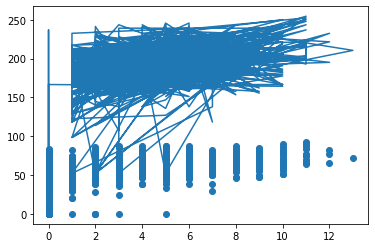

In [14]:
att_test = np.array([75, 0, 50, 73])
att_test = att_test.reshape(-1,1)
plt.scatter(dt['freq'], dt['FINAL.MARK'])
plt.plot(absences, reg.predict(G1))

In [15]:
print('The determination coefficient calculated is: %.4f' % r2, '. Therefore, there is a: %.4f' %r2_perc,'% chance that change in absence will lead to change in the final mark.')

The determination coefficient calculated is: 0.2056 . Therefore, there is a: 20.5619 % chance that change in absence will lead to change in the final mark.


### Post-Hoc Games-Howell Test

The ANOVA analysis of independent samples informs us if there is significant variability between means of two or more samples, however it does not indicate the degree of contribution for samples to the observed variability, for that we employ the Post-Hoc Test. This analysis is only used after the ANOVA, on three or more independent samples and when the Null Hypothesis is rejected. The Games-Howell method is employed when samples have unequal variances.

In [16]:
# Games-Howell Post-Hoc
#post_hocs = []
if p < 0.05:
    pst_hoc = pg.pairwise_gameshowell(data=dt, dv='FINAL.MARK', between='freq', effsize='cohen')
    #post_hocs.append(pst_hoc)
    pg.print_table(pst_hoc, floatfmt='.3f')
else:
    print('The One-Way ANOVA has completed running......','\n','\n', 'Important model output parameters are:', '\n','\n', '-Fstat: %.3f' %f_stat,'\n',
          '-p-value: %.3f' %p,'\n', '-Effect Size [eta2]: %.3f' %eta2,'\n', '-Determination coefficient: %.3f' %r2, '\n','\n',
         'Therefore with p-value > 0.05 and only %.3f'%r2_perc,'% variability depence among our sample means, we accept the Null Hypothesis.')


POST HOC TESTS

     A       B    mean(A)    mean(B)     diff       se        T       df     pval    cohen
------  ------  ---------  ---------  -------  -------  -------  -------  -------  -------
 0.000   1.000     49.608     56.404   -6.796    1.876   -3.623  197.363    0.025   -0.450
 0.000   2.000     49.608     59.059   -9.450    2.051   -4.607  164.989    0.001   -0.582
 0.000   3.000     49.608     60.200  -10.592    1.923   -5.507  162.006    0.000   -0.729
 0.000   4.000     49.608     62.851  -13.243    1.514   -8.749  311.888    0.000   -1.038
 0.000   5.000     49.608     65.819  -16.211    1.612  -10.057  311.914    0.000   -1.137
 0.000   6.000     49.608     68.099  -18.491    1.593  -11.609  268.688    0.000   -1.429
 0.000   7.000     49.608     66.056  -16.447    1.537  -10.699  283.779    0.000   -1.322
 0.000   8.000     49.608     68.323  -18.715    1.611  -11.615  203.560    0.000   -1.624
 0.000   9.000     49.608     68.800  -19.192    1.846  -10.397   96.549 

In [17]:
# Pearson's Correlation

corr = pg.corr(dt['FINAL.MARK'], dt['freq'])
pg.print_table(corr, floatfmt='.5f')

   n        r  CI95%        p-val                                                       BF10    power
----  -------  ---------  -------  ---------------------------------------------------------  -------
1035  0.45345  [0.4 0.5]  0.00000  133700000000000003347170424273880453745113011585024.00000  1.00000



In [18]:
p_val, r_corr = np.array(corr['p-val']), np.array(corr['r'])
if p_val < 0.05:
    if r_corr >= 0.8:
        print('A statistically significant ( p-value: %.1E'%p_val,'(<0.05)), strong positive linear correlation ( r: %.3f'%r_corr,') is found between student marks and attendance.')
    elif 0.3 < r_corr < 0.8:
        print('A statistically significant ( p-value: %.1E'%p_val,'(<0.05)), medium positive linear correlation ( r: %.3f'%r_corr,') is found between student marks and attendance.')
    elif 0.0 < r_corr <=0.3:
        print('A statistically significant ( p-value: %.1E'%p_val,'(<0.05)), weak positive linear correlation ( r: %.3f'%r_corr,') is found between student marks and attendance.')
    elif 0.0 > r_corr >=-0.3:
        print('A statistically significant ( p-value: %.1E'%p_val,'(<0.05)), weak negative linear correlation ( r: %.3f'%r_corr,') is found between student marks and attendance.')
    elif -0.3 > r_corr > -0.8:
        print('A statistically significant ( p-value: %.1E'%p_val,'(<0.05)), medium negative linear correlation ( r: %.3f'%r_corr,') is found between student marks and attendance.')
    elif r_corr >= -0.8:
        print('A statistically significant ( p-value: %.1E'%p_val,'(<0.05)), strong negative linear correlation ( r: %.3f'%r_corr,') is found between student marks and attendance.')
    else:
        print('No linear correlation detected ( r: %.3f' %r_corr,') between student marks and attendance.')       
elif p_val >= 0.05:
    print('No statistically significant linear correlation was detected ( p-value: %.1E' %p_val,' < 0.05) between student marks and attendance.')
        

 

A statistically significant ( p-value: 1.3E-53 (<0.05)), medium positive linear correlation ( r: 0.453 ) is found between student marks and attendance.
